In [ ]:
#cat and Dog Classification

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

The Data set is downloaded here i.e the Google Collab

In [4]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:06<00:00, 277MB/s]
100% 1.06G/1.06G [00:06<00:00, 164MB/s]


To unzip the File use the following Command

In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense , Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

Generators - divides the data into Batches (keras ke andar use hota hai)

In [7]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',# so here cat will be assigned 0 and dog will be 1
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [8]:
#Normalize
def process(image,label):
  image =tf.cast(image/255. , tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

Creating CNN MODEL

In [9]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding="valid", activation="relu",input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(train_ds,epochs=12,validation_data=validation_ds)

Epoch 1/12
625/625 [==============================] - 71s 114ms/step - loss: 0.1535 - accuracy: 0.9418 - val_loss: 2.1357 - val_accuracy: 0.6216
Epoch 2/12
625/625 [==============================] - 65s 104ms/step - loss: 0.1345 - accuracy: 0.9481 - val_loss: 0.6960 - val_accuracy: 0.8142
Epoch 3/12
625/625 [==============================] - 66s 104ms/step - loss: 0.1155 - accuracy: 0.9585 - val_loss: 0.5229 - val_accuracy: 0.8004
Epoch 4/12
625/625 [==============================] - 65s 103ms/step - loss: 0.1074 - accuracy: 0.9618 - val_loss: 0.5823 - val_accuracy: 0.8348
Epoch 5/12
625/625 [==============================] - 65s 103ms/step - loss: 0.1014 - accuracy: 0.9643 - val_loss: 0.5843 - val_accuracy: 0.8270
Epoch 6/12
625/625 [==============================] - 66s 105ms/step - loss: 0.0949 - accuracy: 0.9663 - val_loss: 1.2696 - val_accuracy: 0.7528
Epoch 7/12
625/625 [==============================] - 67s 106ms/step - loss: 0.0939 - accuracy: 0.9688 - val_loss: 0.8599 - val_ac

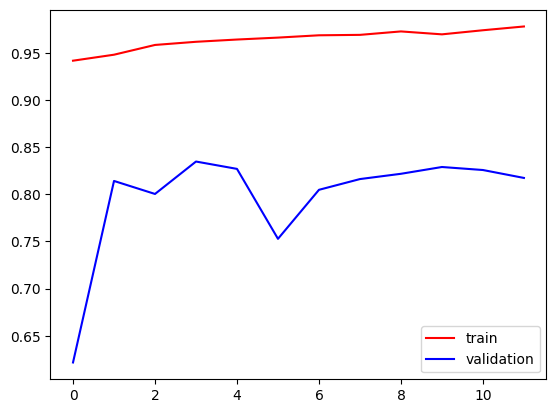

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

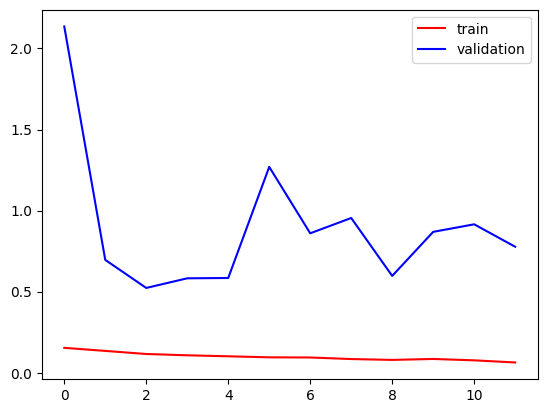

In [16]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [18]:
import cv2

In [20]:
test_img = cv2.imread('/content/Dog image.jpeg')

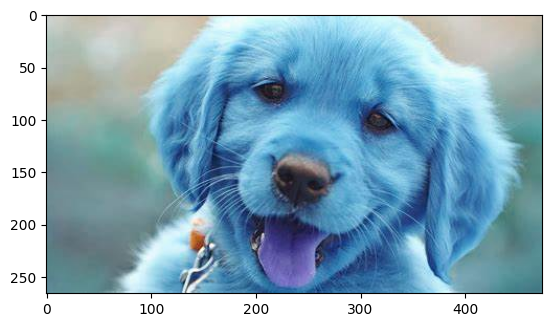

In [21]:
plt.imshow(test_img)

In [22]:
test_img.shape

(266, 474, 3)

In [23]:
test_img = cv2.resize(test_img,(256,256))

In [24]:
test_input = test_img.reshape(1,256,256,3)

In [25]:
model.predict(test_input)

1/1 [==============================] - 1s 584ms/step


array([[1.]], dtype=float32)